In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
import seaborn as sns
from toolbox import plot_tools
import scipy.stats
from toolbox.wololo import redshift2lumdistance, arcsectokpc
import astropy.units as u
from starlight_toolkit.dust import CAL
from matplotlib.patches import Ellipse

sns.set_style('ticks')
palette = sns.diverging_palette(220, 20, n=7)
halpha_palette = sns.light_palette('goldenrod',  5)
f275w_palette = sns.light_palette('mediumvioletred', 5)
f606w_palette = sns.light_palette('indigo', 5)

age_cmap = sns.diverging_palette(220, 20, as_cmap=True, sep=1)

mass_dict = {'JO201': 44194800000,
             'JO204': 54968402000,
             'JW100': 292875993000,
             'JW39': 164373004000,
             'JO175': 33957900300,
             'JO206': 77743301000
}

halpha_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_bagpipes_input.fits')
f275w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_bagpipes_input.fits')
f606w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_bagpipes_input.fits')
optical_only_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_bagpipes_input.fits')

output_halpha = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_dexp_logprior_single_bagpipes_results.fits')
output_f275w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_dexp_logprior_single_bagpipes_results.fits')
output_f606w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_dexp_logprior_single_bagpipes_results.fits')
output_optical_only = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_dexp_logprior_single_bagpipes_results.fits')

halpha_input = halpha_input[(~halpha_input['disk']) & ((halpha_input['level'] == 0) | (halpha_input['leaf_flag'] == 1))]
f275w_input = f275w_input[(~f275w_input['disk']) & ((f275w_input['level'] == 0) | (f275w_input['leaf_flag'] ==1))]

halpha_input = halpha_input[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]
output_halpha = output_halpha[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]

f275w_input = f275w_input[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]
output_f275w = output_f275w[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]

f606w_input = f606w_input[~output_f606w['bad_fit']]
output_f606w = output_f606w[~output_f606w['bad_fit']]

output_halpha['galaxy'] = output_halpha['galaxy'].astype(str)
output_f275w['galaxy'] = output_f275w['galaxy'].astype(str)
output_f606w['galaxy'] = output_f606w['galaxy'].astype(str)

output_halpha['Location'] = np.zeros_like(output_halpha['galaxy'])
output_halpha['Location'][halpha_input['tail_gal_flag'] == 0] = np.full((halpha_input['tail_gal_flag'] == 0).sum(),
                                                                        'Tail')
output_halpha['Location'][halpha_input['tail_gal_flag'] == 1] = np.full((halpha_input['tail_gal_flag'] == 1).sum(),
                                                                        'Extraplanar')

output_f275w['Location'] = np.zeros_like(output_f275w['galaxy'])
output_f275w['Location'][f275w_input['tail_gal_flag'] == 0] = np.full((f275w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f275w['Location'][f275w_input['tail_gal_flag'] == 1] = np.full((f275w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_f606w['Location'] = np.zeros_like(output_f606w['galaxy'])
output_f606w['Location'][f606w_input['tail_gal_flag'] == 0] = np.full((f606w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f606w['Location'][f606w_input['tail_gal_flag'] == 1] = np.full((f606w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_halpha['galaxy_mass'] = np.zeros_like(output_halpha['mwage'])
for i in range(len(output_halpha)):
    output_halpha['galaxy_mass'][i] = np.log10(mass_dict[output_halpha['galaxy'][i]])

output_f275w['galaxy_mass'] = np.zeros_like(output_f275w['mwage'])
for i in range(len(output_f275w)):
    output_f275w['galaxy_mass'][i] = np.log10(mass_dict[output_f275w['galaxy'][i]])

output_f606w['galaxy_mass'] = np.zeros_like(output_f606w['mwage'])
for i in range(len(output_f606w)):
    output_f606w['galaxy_mass'][i] = np.log10(mass_dict[output_f606w['galaxy'][i]])

output_halpha['mwage'] *= 1e3
output_f275w['mwage'] *= 1e3
output_f606w['mwage'] *= 1e3
output_optical_only['mwage'] *= 1e3

output_halpha['age'] *= 1e3
output_f275w['age'] *= 1e3
output_f606w['age'] *= 1e3
output_optical_only['age'] *= 1e3

output_halpha['sfr'] = np.log10(output_halpha['sfr'])
output_f275w['sfr'] = np.log10(output_f275w['sfr'])
output_f606w['sfr'] = np.log10(output_f606w['sfr'])

output_halpha['Av'] = output_halpha['Av'] * output_halpha['eta']
output_f275w['Av'] = output_f275w['Av'] * output_f275w['eta']
output_f606w['Av'] = output_f606w['Av'] * output_f606w['eta']

conversion_factor = arcsectokpc(halpha_input['galaxy_redshift'])
halpha_input['area_exct'] = halpha_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f275w_input['galaxy_redshift'])
f275w_input['area_exct'] = f275w_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f606w_input['galaxy_redshift'])
f606w_input['area_exct'] = f606w_input['area_exact'] * conversion_factor ** 2

print(len(output_halpha), len(output_f275w), len(output_f606w))

print(np.min(output_f606w['stellar_mass']), np.max(output_f606w['stellar_mass']))
print(np.percentile(output_f606w['stellar_mass'], 5))

347 851 296
3.895757757742637 7.153244136104432
4.183749741075106


0.7338285955173789 -6.3720642658626
UV out of MS: 252 0.29612220916568743 UV in or above the MS: 599
How many extraplanar are below: 0.43617021276595747
How many tail are below: 0.18526315789473685
How many below are extraplanar: 0.6507936507936508
How many below are tail: 0.3492063492063492
Complexes out of MS: 62 0.20945945945945946 Complexes in or above the MS: 234


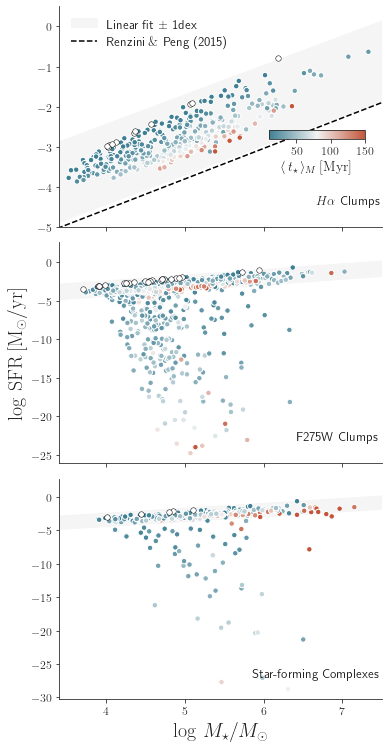

In [3]:
fig, ax = plt.subplots(3, 1, figsize=(5.5, 10.5), sharex=True)


flag = output_halpha['sfr'] > -20
age_flag = flag & (output_halpha['age'] < 10)
fit_flag = flag & (output_halpha['age'] > 10) & (~np.isinf(output_halpha['sfr'])) & ~((output_halpha['sfr'] < -2) & (output_halpha['stellar_mass'] > 6.9))

correlation = scipy.stats.linregress(output_halpha['stellar_mass'][fit_flag], output_halpha['sfr'][fit_flag])
print(correlation.slope, correlation.intercept)

a, b = correlation.slope, correlation.intercept
x = np.linspace(3, 9)

mappable = ax[0].scatter(output_halpha['stellar_mass'][flag & ~age_flag], output_halpha['sfr'][flag & ~age_flag], 
                       c=output_halpha['mwage'][flag & ~age_flag], cmap=age_cmap, edgecolors='white',
                       s=30, vmin=10, vmax=150)
ax[0].scatter(output_halpha['stellar_mass'][age_flag], output_halpha['sfr'][age_flag], 
              edgecolors='k', facecolor='white', s=30, linewidths=0.5)

cb_ax = ax[0].inset_axes([0.65, 0.4, 0.3, 0.04])
cb = plt.colorbar(cax=cb_ax, orientation='horizontal', mappable=mappable)
cb.set_label(r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=14)
cb_ax.tick_params(labelsize=12)


flag = (output_f275w['sfr'] > np.percentile(output_f275w['sfr'], 1))
age_flag = flag & (output_f275w['age'] < 10)

ax[1].scatter(output_f275w['stellar_mass'][flag & ~age_flag], output_f275w['sfr'][flag & ~age_flag],
                       c=output_f275w['mwage'][flag & ~age_flag], cmap=age_cmap, edgecolors='white', 
                       s=30, vmin=10, vmax=150)
ax[1].scatter(output_f275w['stellar_mass'][age_flag], output_f275w['sfr'][age_flag], 
            edgecolors='k', facecolor='white', s=30, linewidths=0.5)


flag = (output_f606w['sfr'] > np.percentile(output_f606w['sfr'], 1)) & (output_f606w['stellar_mass'] > 3)
age_flag = flag & (output_f606w['age'] < 10)

ax[2].scatter(output_f606w['stellar_mass'][flag & ~age_flag], output_f606w['sfr'][flag & ~age_flag],
                       c=output_f606w['mwage'][flag & ~age_flag], cmap=age_cmap, edgecolors='white', 
                       s=30, vmin=10, vmax=150)
ax[2].scatter(output_f606w['stellar_mass'][age_flag], output_f606w['sfr'][age_flag], 
              edgecolors='k', facecolor='white', s=30, linewidths=0.5)


labels = [r'$H\alpha$ Clumps', 'F275W Clumps', 'Star-forming Complexes']

for i in range(3):
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].fill_between(x, (a*x + b) + 1, (a*x + b) - 1, zorder=0, alpha=1, color='whitesmoke', label=r'Linear fit $\pm$ 1dex')
    ax[i].annotate(labels[i], xy=(0.99, 0.1), xycoords='axes fraction', fontsize=13, horizontalalignment='right')

whitaker_alpha = lambda z: 0.70 - 0.13 * z
whitaker_beta = lambda z: 0.38 + 1.14 * z - 0.19 * z ** 2
    
ax[0].plot(x, 0.76*x - 7.64 + 0.04, '--k', label=r'Renzini $\&$ Peng (2015)')
# ax[0].plot(x, 1.63*x - 13, ls='--', color='purple', label=r'Vulcani et al. (2020)')
# ax[0].plot(x, whitaker_alpha(0) * (x - 10.5) + whitaker_beta(0), ':k', label=r'Whitaker et al. (2012)')
# ax[0].plot(x, whitaker_alpha(1) * (x - 10.5) + whitaker_beta(1), ':k')
#  log(SFR) = (0.76 ± 0.01)log(M∗/Me) − 7.64 ± 0.02 (renzini and peng 2015) + 0.04 for kroupa IMF    

ax[2].set_xlabel(r'$\log\,M_\star/M_\odot$', fontsize=20)
ax[1].set_ylabel(r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', fontsize=20)

plt.xlim(3.4, 7.5)
ax[0].set_ylim(-5, 0.5)

ax[0].legend(frameon=False, fontsize=13)

fig.tight_layout()
fig.subplots_adjust(hspace=0.07)

sns.despine()

plt.savefig('mass-sfr.pdf')

# Some statistics:

out_of_ms_uv = output_f275w['sfr'] < (a * output_f275w['stellar_mass'] + b -1)
print('UV out of MS:', out_of_ms_uv.sum(), out_of_ms_uv.sum()/len(output_f275w), 'UV in or above the MS:', len(output_f275w)-out_of_ms_uv.sum())
print('How many extraplanar are below:', (out_of_ms_uv & (output_f275w['Location'] == 'Extraplanar')).sum()/(output_f275w['Location'] == 'Extraplanar').sum())
print('How many tail are below:', (out_of_ms_uv & (output_f275w['Location'] == 'Tail')).sum()/(output_f275w['Location'] == 'Tail').sum())

print('How many below are extraplanar:', (out_of_ms_uv & (output_f275w['Location'] == 'Extraplanar')).sum()/out_of_ms_uv.sum())
print('How many below are tail:', (out_of_ms_uv & (output_f275w['Location'] == 'Tail')).sum()/out_of_ms_uv.sum())


out_of_ms_complex = output_f606w['sfr'] < (a * output_f606w['stellar_mass'] + b -1)
print('Complexes out of MS:', out_of_ms_complex.sum(), out_of_ms_complex.sum()/len(output_f606w), 'Complexes in or above the MS:', len(output_f606w)-out_of_ms_complex.sum())


# Tail clumps age along the main sequence while extraplanar drift away or tail clumps are more in the main sequence
# just because thei are younger?
# Fraction in MS aganist age for tail and extraplanar
# Distribution of ages for tail and extraplanar in and out of MS

# plt.figure()

# plt.hist(output_f275w['mwage'][out_of_ms_uv & (output_f275w['Location'] == 'Extraplanar')], bins=30, range=[0, 200], histtype='step', density=False)
# plt.hist(output_f275w['mwage'][out_of_ms_uv & (output_f275w['Location'] == 'Tail')], bins=30, range=[0, 200], histtype='step', density=False)

# plt.show()

# plt.figure()

# plt.hist(output_f275w['mwage'][~out_of_ms_uv & (output_f275w['Location'] == 'Extraplanar')], bins=30, range=[0, 200], histtype='step', density=False)
# plt.hist(output_f275w['mwage'][~out_of_ms_uv & (output_f275w['Location'] == 'Tail')], bins=30, range=[0, 200], histtype='step', density=False)

# plt.show()


# plt.figure()

# hist_ages_extraplanar_out = np.histogram(output_f275w['mwage'][out_of_ms_uv & (output_f275w['Location'] == 'Extraplanar')], bins=10, range=[0, 50])
# hist_ages_tail_out = np.histogram(output_f275w['mwage'][out_of_ms_uv & (output_f275w['Location'] == 'Tail')], bins=10, range=[0, 50])

# hist_ages_extraplanar_in = np.histogram(output_f275w['mwage'][~out_of_ms_uv & (output_f275w['Location'] == 'Extraplanar')], bins=10, range=[0, 50])
# hist_ages_tail_in = np.histogram(output_f275w['mwage'][~out_of_ms_uv & (output_f275w['Location'] == 'Tail')], bins=10, range=[0, 50])

# hist_ages_extraplanar_all = np.histogram(output_f275w['mwage'][(output_f275w['Location'] == 'Extraplanar')], bins=10, range=[0, 50])
# hist_ages_tail_all = np.histogram(output_f275w['mwage'][(output_f275w['Location'] == 'Tail')], bins=10, range=[0, 50])

# bin_centers = [(hist_ages_extraplanar_in[1][i]+hist_ages_extraplanar_in[1][i+1])/2 for i in range(10)]

# plt.scatter(bin_centers, hist_ages_extraplanar_in[0]/hist_ages_extraplanar_all[0], label='Extraplanar')
# plt.scatter(bin_centers, hist_ages_tail_in[0]/hist_ages_tail_all[0], label='Tail')

# plt.legend()

# plt.xlabel('MW age')
# plt.ylabel('Fraction of clumps in the MS')

# plt.show()

In [4]:
for galaxy in ['JO175', 'JO201', 'JO204', 'JO206', 'JW39', 'JW100']:
    flag = output_halpha['sfr'] > -20
    age_flag = flag & (output_halpha['age'] < 10) 
    fit_flag = flag & (output_halpha['age'] > 10) & (~np.isinf(output_halpha['sfr'])) & ~((output_halpha['sfr'] < -2) & (output_halpha['stellar_mass'] > 6.9)) & (output_halpha['galaxy'] == galaxy)

    correlation = scipy.stats.linregress(output_halpha['stellar_mass'][fit_flag], output_halpha['sfr'][fit_flag])
    print(galaxy, correlation.slope, correlation.intercept, correlation.stderr)

JO175 0.6076081501508295 -6.038679254724972 0.08325012498600869
JO201 0.7673510437180127 -6.446914174104394 0.05885044188768052
JO204 0.6825105678204016 -6.258355486840229 0.04539477342773258
JO206 0.7987636188547067 -6.666330444887855 0.03790286868241217
JW39 0.8336018516094867 -6.577962280662534 0.1055645250274166
JW100 0.5690111164746011 -5.618740677529516 0.0576662352527402


0.16680337053860309 -3.932318692257069


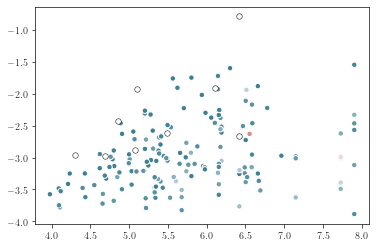

In [4]:
flag = (output_halpha['sfr'] > -20) & (output_halpha['match_flag_output'])
age_flag = flag & (output_halpha['age'] < 10)
fit_flag = flag & (output_halpha['age'] > 10) & (~np.isinf(output_halpha['sfr'])) & ~((output_halpha['sfr'] < -2) & (output_halpha['stellar_mass'] > 6.9))

correlation = scipy.stats.linregress(output_halpha['parent_stellar_mass'][fit_flag], output_halpha['sfr'][fit_flag])
print(correlation.slope, correlation.intercept)

a, b = correlation.slope, correlation.intercept
x = np.linspace(3, 9)


plt.figure()
ax = plt.gca()

mappable = ax.scatter(output_halpha['parent_stellar_mass'][flag & ~age_flag], output_halpha['sfr'][flag & ~age_flag], 
                       c=output_halpha['mwage'][flag & ~age_flag], cmap=age_cmap, edgecolors='white',
                       s=30, vmin=10, vmax=150)
ax.scatter(output_halpha['parent_stellar_mass'][age_flag], output_halpha['sfr'][age_flag], 
              edgecolors='k', facecolor='white', s=30, linewidths=0.5)


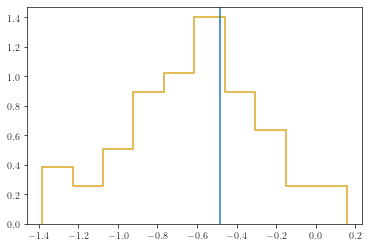

In [3]:
plt.hist(np.log10((10**output_halpha['sfr'])/(np.pi*(1.175*(halpha_input['r_core_corr']+0.025)**2)))[halpha_input['resolved_flag'].astype(bool)], histtype='step', lw=1.5, density=True, color=halpha_palette[4], bins=10)

# plt.hist(np.log10((10**output_f275w['sfr'])/f275w_input['area_exact'])[~out_of_ms_uv & f275w_input['resolved_flag'].astype(bool)], histtype='step', lw=1.5, density=True, color=f275w_palette[4], bins=15)

# plt.hist(np.log10((10**output_f606w['sfr'])/f606w_input['area_exact'])[~out_of_ms_complex & f606w_input['resolved_flag'].astype(bool)], histtype='step', lw=1.5, density=True, color=f606w_palette[4], bins=15)

plt.axvline(x=np.log10(0.33))

2.0329889235457803 -5.933788193281166


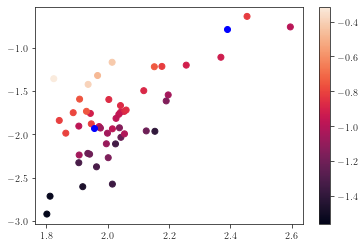

In [4]:
flag = output_halpha['sfr'] > -20
age_flag = flag & (output_halpha['age'] < 10)

sigma_sfr = np.log10((10**output_halpha['sfr'])/halpha_input['area_exact'])

plt.scatter(np.log10(halpha_input['r_core_corr'][~age_flag & halpha_input['resolved_flag'].astype(bool)])+3, 
            output_halpha['sfr'][~age_flag & halpha_input['resolved_flag'].astype(bool)], c=sigma_sfr[~age_flag & halpha_input['resolved_flag'].astype(bool)])

plt.colorbar()

plt.scatter(np.log10(halpha_input['r_core_corr'][age_flag & halpha_input['resolved_flag'].astype(bool)])+3,
            output_halpha['sfr'][age_flag & halpha_input['resolved_flag'].astype(bool)], color='blue')

correlation_halpha = scipy.stats.linregress(np.log10(halpha_input['r_core_corr'][~age_flag & halpha_input['resolved_flag'].astype(bool)]) + 3,
                                            output_halpha['sfr'][~age_flag & halpha_input['resolved_flag'].astype(bool)])
print(correlation_halpha.slope, correlation_halpha.intercept)
a_halpha, b_halpha = correlation_halpha.slope, correlation_halpha.intercept

0.7338285955173789 -6.3720642658626


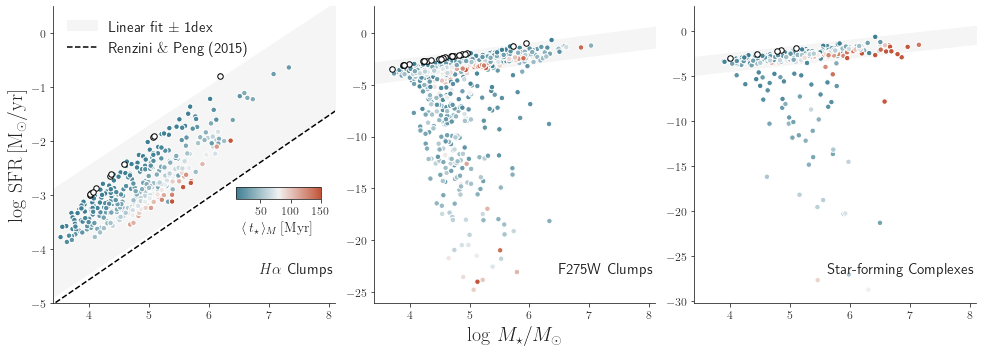

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(13.75, 5), sharex=True)


flag = output_halpha['sfr'] > -20
age_flag = flag & (output_halpha['age'] < 10)
fit_flag = flag & (output_halpha['age'] > 10) & (~np.isinf(output_halpha['sfr'])) & ~((output_halpha['sfr'] < -2) & (output_halpha['stellar_mass'] > 6.9))

correlation = scipy.stats.linregress(output_halpha['stellar_mass'][fit_flag], output_halpha['sfr'][fit_flag])
print(correlation.slope, correlation.intercept)

a, b = correlation.slope, correlation.intercept
x = np.linspace(3, 9)

mappable = ax[0].scatter(output_halpha['stellar_mass'][flag], output_halpha['sfr'][flag], 
                       c=output_halpha['mwage'][flag], cmap=age_cmap, edgecolors='white',
                       s=30, vmin=10, vmax=150)
ax[0].scatter(output_halpha['stellar_mass'][age_flag], output_halpha['sfr'][age_flag], 
              edgecolors='k', facecolor='white', s=30, linewidths=1)

cb_ax = ax[0].inset_axes([0.65, 0.35, 0.3, 0.04])
cb = plt.colorbar(cax=cb_ax, orientation='horizontal', mappable=mappable)
cb.set_label(r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=14)
cb_ax.tick_params(labelsize=12)


flag = (output_f275w['sfr'] > np.percentile(output_f275w['sfr'], 1))
age_flag = flag & (output_f275w['age'] < 10)

ax[1].scatter(output_f275w['stellar_mass'][flag], output_f275w['sfr'][flag],
                       c=output_f275w['mwage'][flag], cmap=age_cmap, edgecolors='white', 
                       s=30, vmin=10, vmax=150)
ax[1].scatter(output_f275w['stellar_mass'][age_flag], output_f275w['sfr'][age_flag], 
            edgecolors='k', facecolor='white', s=30, linewidths=1)


flag = (output_f606w['sfr'] > np.percentile(output_f606w['sfr'], 1)) & (output_f606w['stellar_mass'] > 3)
age_flag = flag & (output_f606w['age'] < 10)

ax[2].scatter(output_f606w['stellar_mass'][flag], output_f606w['sfr'][flag],
                       c=output_f606w['mwage'][flag], cmap=age_cmap, edgecolors='white', 
                       s=30, vmin=10, vmax=150)
ax[2].scatter(output_f606w['stellar_mass'][age_flag], output_f606w['sfr'][age_flag], 
              edgecolors='k', facecolor='white', s=30, linewidths=1)


labels = [r'$H\alpha$ Clumps', 'F275W Clumps', 'Star-forming Complexes']

for i in range(3):
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].fill_between(x, (a*x + b) + 1, (a*x + b) - 1, zorder=0, alpha=1, color='whitesmoke', label=r'Linear fit $\pm$ 1dex')
    ax[i].annotate(labels[i], xy=(0.99, 0.1), xycoords='axes fraction', fontsize=15, horizontalalignment='right')

whitaker_alpha = lambda z: 0.70 - 0.13 * z
whitaker_beta = lambda z: 0.38 + 1.14 * z - 0.19 * z ** 2
    
ax[0].plot(x, 0.76*x - 7.64 + 0.04, '--k', label=r'Renzini $\&$ Peng (2015)')

ax[1].set_xlabel(r'$\log\,M_\star/M_\odot$', fontsize=20)
ax[0].set_ylabel(r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', fontsize=20)

plt.xlim(3.4, 8.1)
ax[0].set_ylim(-5, 0.5)
# ax[1].set_ylim(-15, 0.5)
# ax[2].set_ylim(-15, 0.5)

ax[0].legend(frameon=False, fontsize=15, loc=2)

fig.tight_layout()
fig.subplots_adjust(hspace=0.07)

sns.despine()

plt.savefig('mass-sfr_presentations.jpg', dpi=300)

-0.11200900525014734


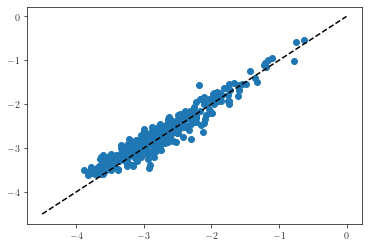

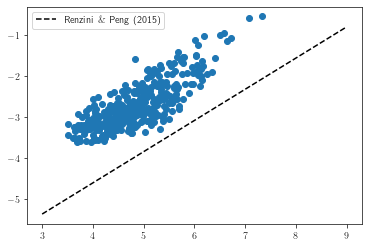

In [6]:
distance_cm = redshift2lumdistance(halpha_input['galaxy_redshift']) * 3.086e+24
flux_corr = 0.65 * halpha_input['F680N_line_flux'] * np.e ** (1.086 * output_halpha['Av'] * CAL(6563))
halpha_luminosity = flux_corr * 4 * np.pi * (distance_cm) ** 2 * u.cm ** 2

halpha_sfr = np.log10(halpha_luminosity.value / (10 ** 41.28))

print(np.median(output_halpha['sfr'] - halpha_sfr))

flag = output_halpha['sfr'] > -20
plt.scatter(output_halpha['sfr'][flag], halpha_sfr[flag])

x = np.linspace(-4.5, 0)
y = x

plt.plot(x, y, '--k')

plt.show()

plt.scatter(output_halpha['stellar_mass'][flag], halpha_sfr[flag])
x = np.linspace(3, 9)
plt.plot(x, 0.76*x - 7.64, '--k', label=r'Renzini $\&$ Peng (2015)')
plt.legend()

0.014880069953536301


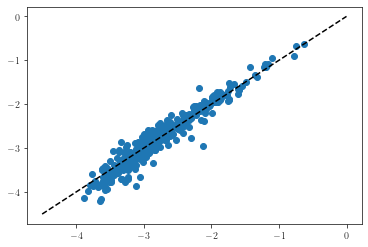

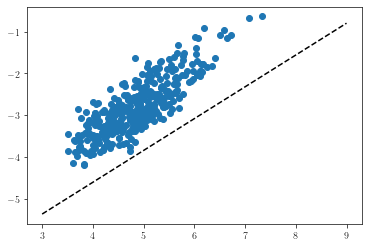

In [7]:
distance_cm = redshift2lumdistance(halpha_input['galaxy_redshift']) * 3.086e+24
flux_corr = output_halpha['Ha'] * np.e ** (1.086 * output_halpha['Av'] * CAL(6563))
halpha_luminosity = flux_corr * 4 * np.pi * (distance_cm) ** 2 * u.cm ** 2

halpha_sfr = np.log10(halpha_luminosity.value / (10 ** 41.28))

print(np.median(output_halpha['sfr'] - halpha_sfr))

flag = (output_halpha['sfr'] > -20) & (halpha_sfr > -20)
plt.scatter(output_halpha['sfr'][flag], halpha_sfr[flag])

x = np.linspace(-4.5, 0)
y = x

plt.plot(x, y, '--k')

plt.show()

plt.scatter(output_halpha['stellar_mass'][flag], halpha_sfr[flag])
x = np.linspace(3, 9)
plt.plot(x, 0.76*x - 7.64, '--k', label=r'Renzini $\&$ Peng (2015)')

plt.show()